In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [2]:
path = '/home/dgray24/'
fname = 'precip.mon.mean.nc'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 442)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2015-10-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:      COARDS
    title:            GPCP Version 2.2 Combined Precipitation Dataset (Final)
    platform:         Observation
    source:           GPCP Polar Satellite Precipitation Data Centre - Emissi...
    version:          V2.2
    comments:         Please redownload if you obtained this file before Aug ...
    Acknowledgement:  \n,Please cite the original source of the data.\nPlease...
    history:          Converted from netCDF3 to chunked, deflated NetCDF4 Aug...
    dataset_title:    Global Precipitation Analysis (GPCP)
    documentation:    https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html
    References:       https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html

In [3]:
ds_precip1 = ds.sel(time=slice('1979-01-01'))
ds_precip1

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 1)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:      COARDS
    title:            GPCP Version 2.2 Combined Precipitation Dataset (Final)
    platform:         Observation
    source:           GPCP Polar Satellite Precipitation Data Centre - Emissi...
    version:          V2.2
    comments:         Please redownload if you obtained this file before Aug ...
    Acknowledgement:  \n,Please cite the original source of the data.\nPlease...
    history:          Converted from netCDF3 to chunked, deflated NetCDF4 Aug...
    dataset_title:    Global Precipitation Analysis (GPCP)
    documentation:    https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html
    References:       https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html

''

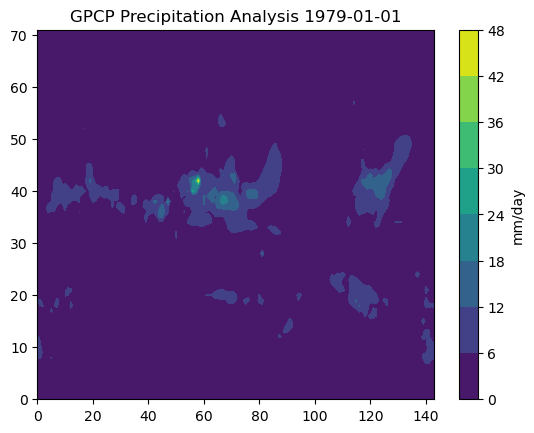

In [4]:
plt.contourf(ds_precip1['precip'].squeeze())
plt.title('GPCP Precipitation Analysis 1979-01-01')
;
plt.colorbar(label=ds.precip.attrs['units'])
;

In [5]:
ds.precip

<xarray.DataArray 'precip' (time: 442, lat: 72, lon: 144)>
[4582656 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2015-10-01
Attributes:
    long_name:     Average Monthly Rate of Precipitation
    valid_range:   [  0. 100.]
    units:         mm/day
    precision:     32767
    var_desc:      Precipitation
    dataset:       GPCP Version 2.2 Combined Precipitation Dataset
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Mean
    actual_range:  [ 0.      47.07601]

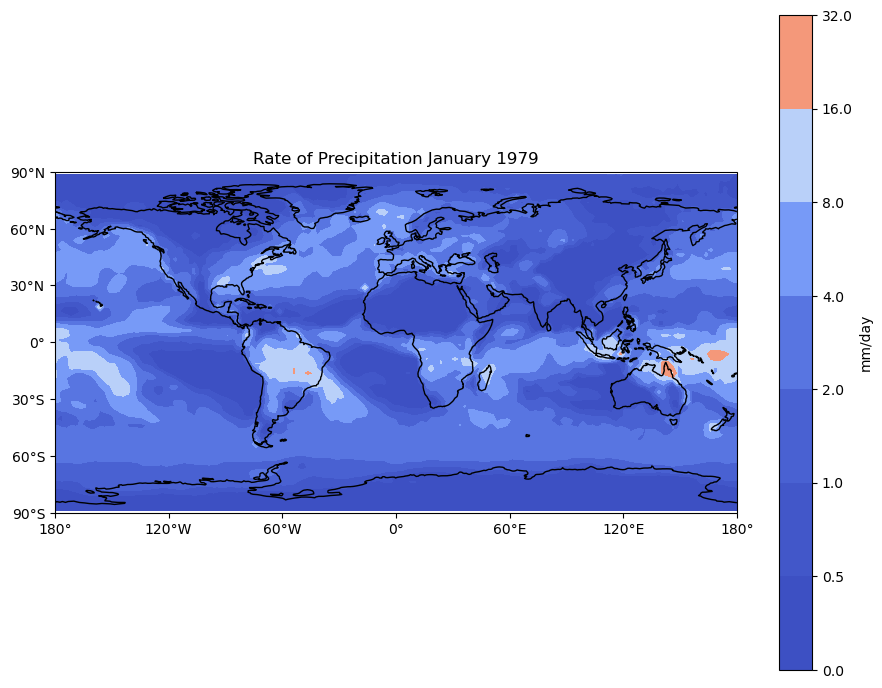

In [6]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

data=ds.precip[0,:,:]
data, lons = add_cyclic_point(data, coord=ds['lon'])

cs=ax.contourf(lons, ds['lat'], data,
            transform = ccrs.PlateCarree(),levels=[0,0.5,1,2,4,8,16,32], cmap="coolwarm")

ax.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 
;
ax.coastlines()
;
plt.title('Rate of Precipitation January 1979')

plt.colorbar(cs,label=ds.precip.attrs['units'])